In [1]:
import numpy as np
import pandas as pd
import talib as ta

leg1_symbol = 'M1609' # Leg1
leg2_symbol = 'M1701' # Leg2
start_date = '20160401'
end_date = '20160830'



In [2]:
# 显示走势图
def display(df,columns):    
    df2=df.copy()
    df2=df2[columns]
    df2.index  = list(range(len(df)))
    df2.plot(figsize=[12,8])
    plt.legend()
    
# 显示两个合约的相关度
def display_coor(df,columns):
    df2 = df.copy()
    df2 = df2[columns]
    corr=df2.corr()
    print(corr)
    
    
# 显示两个合约的协整值，合约配比
def display_ols(df,leg1,leg2):
    import statsmodels.api as sm
    
    columns = []
    columns.append(leg1)
    columns.append(leg2)
    df2 = df.copy()
    df2 = df2[columns]
    X=df2[leg1].values
    y=df2[leg2].values


    model = sm.OLS(y, X)
    results = model.fit()
    print(results.summary())
    
    # 查看两个合约的配比
    plt.figure(figsize=[20,8])
    plt.plot(y/X) # 查看 leg2/leg1的价格比率
    plt.axhline(np.mean(y/X), color="red", linestyle="--")
    plt.axhline(np.mean(y/X)+np.std(y/X)*1.5, color="red", linestyle="--")
    plt.axhline(np.mean(y/X)-np.std(y/X)*1.5, color="red", linestyle="--")
    

In [3]:
# 读取2个合约的3四个月内的分钟数据
leg1=get_price(leg1_symbol,start_date=start_date,end_date=end_date,fields='close',frequency='1m') # leg1
leg2=get_price(leg2_symbol,start_date=start_date,end_date=end_date,fields='close',frequency='1m') # leg2


leg1.head()

2016-03-31 21:01:00    2334.0
2016-03-31 21:02:00    2334.0
2016-03-31 21:03:00    2331.0
2016-03-31 21:04:00    2332.0
2016-03-31 21:05:00    2332.0
Name: close, dtype: float64

In [4]:
leg2.tail()

2016-08-30 14:56:00    2918.0
2016-08-30 14:57:00    2915.0
2016-08-30 14:58:00    2917.0
2016-08-30 14:59:00    2918.0
2016-08-30 15:00:00    2918.0
Name: close, dtype: float64

In [5]:
df = leg1.to_frame(name='leg1')
df['leg2']=leg2


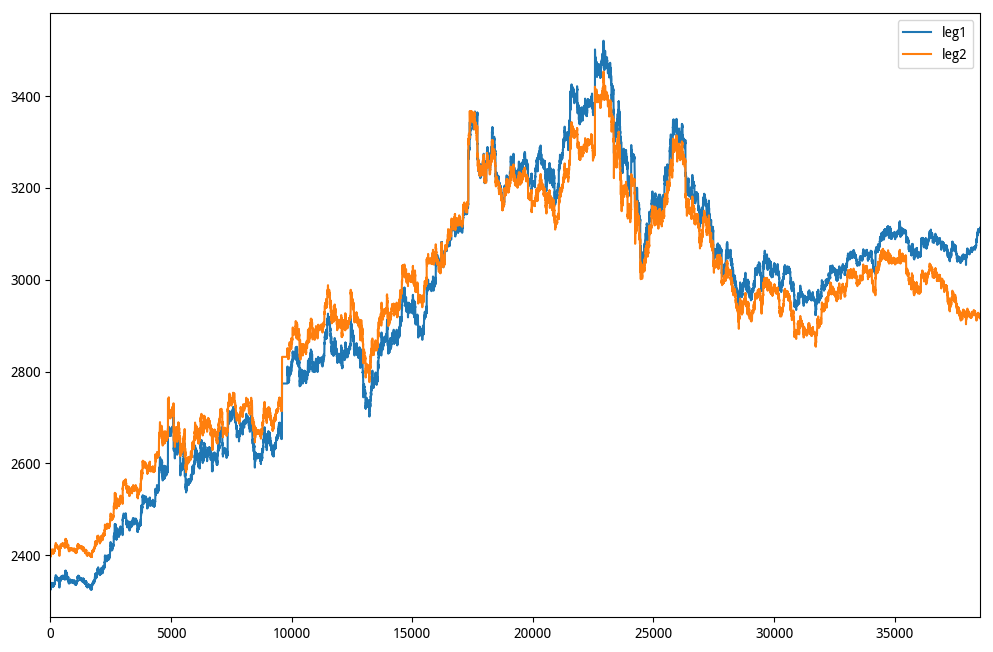

In [6]:
display(df,['leg1','leg2'])

In [7]:
display_coor(df,['leg1','leg2'])

          leg1      leg2
leg1  1.000000  0.986769
leg2  0.986769  1.000000


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.274e+07
Date:                Tue, 11 Apr 2017   Prob (F-statistic):               0.00
Time:                        06:30:33   Log-Likelihood:            -2.1259e+05
No. Observations:               38550   AIC:                         4.252e+05
Df Residuals:                   38549   BIC:                         4.252e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.9972      0.000   9630.007      0.0

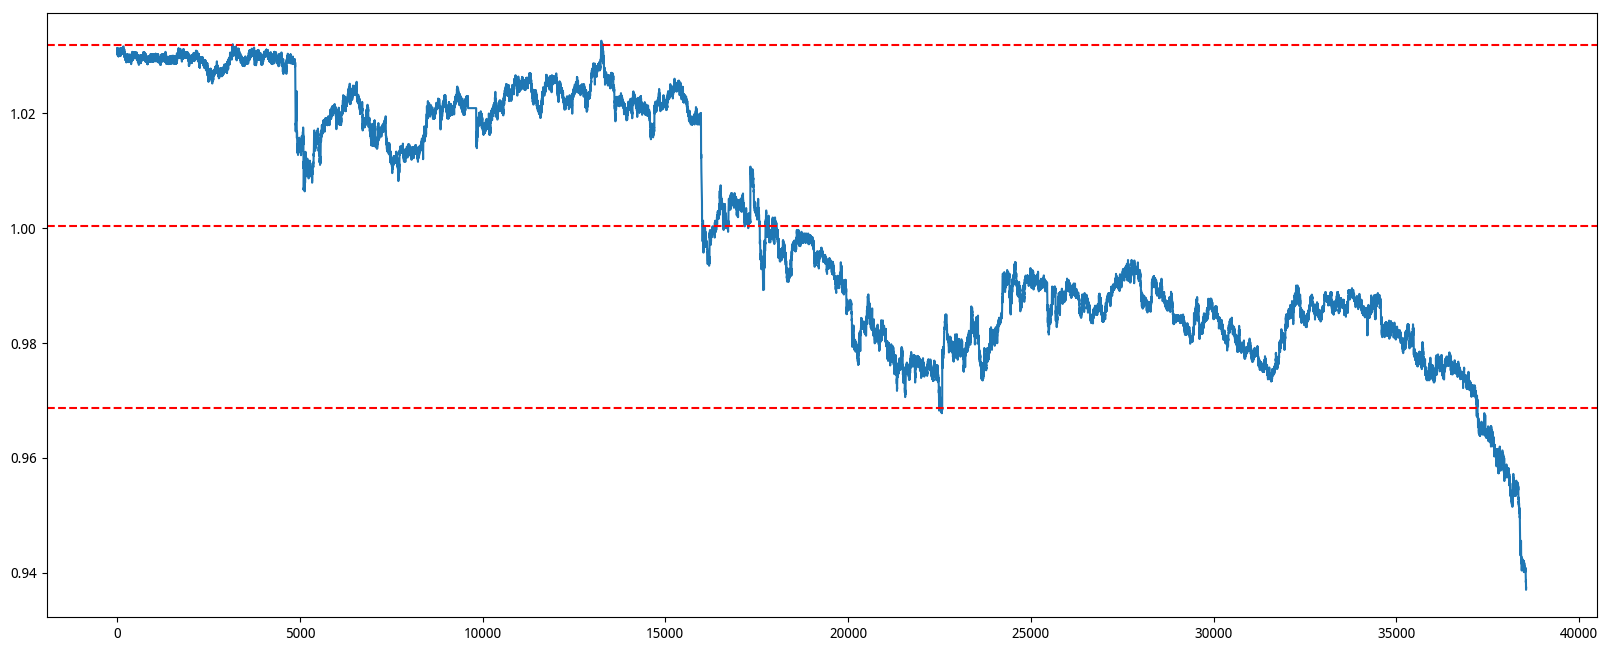

In [8]:
display_ols(df,'leg1','leg2')

In [21]:
filename = u'{0}_{1}_{2}_{3}.csv'.format(leg1_symbol,leg2_symbol,start_date,end_date)
df.to_csv(filename)